In [52]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [ ]:
data = pd.read_csv(r"C:\Users\nahia\OneDrive\Escritorio\Ironhack_Bootcamp\Woche_Fünf\archive (1)\king_ country_ houses_aa.csv")

In [54]:
df=data.copy()

### Dataset Feature Description
**id**: A unique identifier for a house.  
**date**: The date on which the house was sold.  
**price**: The sale price of the house (prediction target).  
**bedrooms**: Number of bedrooms in the house.  
**bathrooms**: Number of bathrooms in the house, per bedroom.  
**sqft_living**: Square footage of the interior living space.  
**sqft_lot**: Square footage of the land space.  
**floors**: Number of floors (levels) in the house.  
**waterfront**: Whether the house has a waterfront view.  
**view**: Number of times the house has been viewed.  
**condition**: The overall condition of the house.  
**grade**: The overall grade given to the house, based on the King County grading system.  
**sqft_above**: Square footage of the house apart from the basement.  
**sqft_basement**: Square footage of the basement.  
**yr_built**: The year the house was built.  
**yr_renovated**: The year the house was renovated.  
**zipcode**: ZIP code area.  
**lat**: Latitude coordinate.  
**long**: Longitude coordinate.  
**sqft_living15**: The interior living space for the nearest 15 neighbors in 2015.  
**sqft_lot15**: The land spaces for the nearest 15 neighbors in 2015.  
**TARGET --> Price**: Our primary focus is to understand which features most significantly impact the house price. Additionally, we aim to explore properties valued at $650K and above for more detailed insights. 


Explanation:
There are two main **types** of training setups:
1. Models trained using raw (unfiltered) data
2. Models trained using filtered (cleaned) data

Each type includes multiple regression models (e.g., Linear Regression, Decision Tree, Random Forest, XGBoost, AdaBoost).

Goal:
- Compare models within each type.
- Then compare performance across the two types to analyze how data filtering affects model evaluation metrics like RMSE, MAPE, MSE, and R².

# Models with unfilterd data

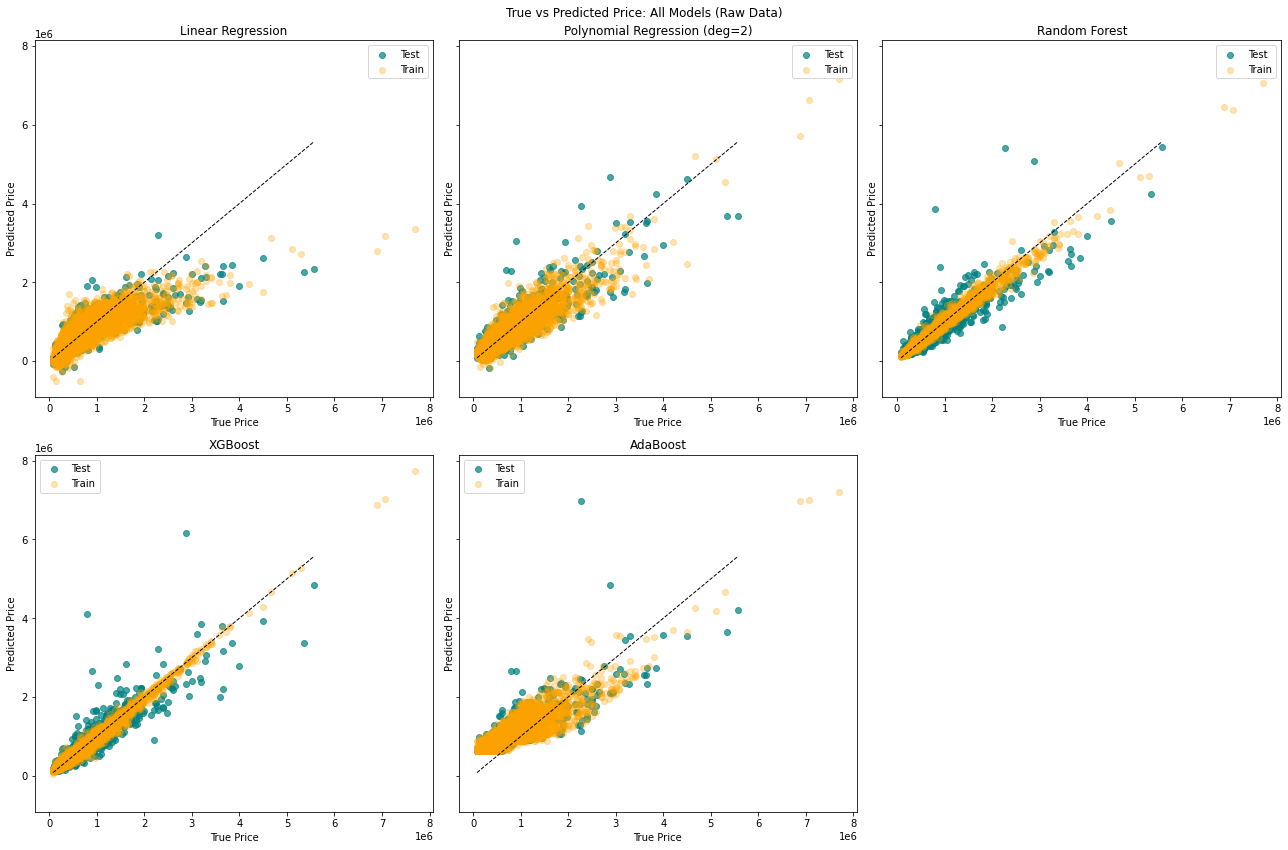

In [55]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ==== Data setup ====
df_raw = data.copy()
df_raw = df_raw.drop(columns=["id", "date"], errors="ignore")
X_raw = df_raw.drop(columns=["price"])
y_raw = df_raw["price"]
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (deg=2)": None,  # Special case
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror'),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
}

results = []
train_preds = {}
test_preds = {}

for name, model in models.items():
    if name == "Polynomial Regression (deg=2)":
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, y_train)
        y_train_pred = poly_model.predict(X_train_poly)
        y_test_pred = poly_model.predict(X_test_poly)
        train_preds[name] = y_train_pred
        test_preds[name] = y_test_pred
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_preds[name] = y_train_pred
        test_preds[name] = y_test_pred

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    percent_rmse_test = rmse_test / np.mean(y_test) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    results.append([
        name,
        round(r2_train, 2),
        round(r2_test, 2),
        round(mse_test, 2),
        round(rmse_test, 2),
        round(percent_rmse_test, 2),
        round(mape_test, 2)
    ])

        
models_to_plot = [
    ("Linear Regression", y_train, train_preds["Linear Regression"], y_test, test_preds["Linear Regression"]),
    ("Polynomial Regression (deg=2)", y_train, train_preds["Polynomial Regression (deg=2)"], y_test, test_preds["Polynomial Regression (deg=2)"]),
    ("Random Forest", y_train, train_preds["Random Forest"], y_test, test_preds["Random Forest"]),
    ("XGBoost", y_train, train_preds["XGBoost"], y_test, test_preds["XGBoost"]),
    ("AdaBoost", y_train, train_preds["AdaBoost"], y_test, test_preds["AdaBoost"])
]

# Arrange plots in a 2x3 grid for up to 5 models
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows), sharey=True)
axes = axes.flatten()

for i, (name, y_train_true, y_train_pred, y_test_true, y_test_pred) in enumerate(models_to_plot):
    ax = axes[i]
    ax.scatter(y_test_true, y_test_pred, alpha=0.7, label='Test', color='teal')
    ax.scatter(y_train_true, y_train_pred, alpha=0.3, label='Train', color='orange')
    ax.plot([min(y_test_true), max(y_test_true)], [min(y_test_true), max(y_test_true)], '--', color='black', linewidth=1)
    ax.set_xlabel('True Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(name)
    ax.legend()
    
# Remove empty plot if less than grid slots used
for j in range(len(models_to_plot), rows * cols):
    fig.delaxes(axes[j])
plt.suptitle("True vs Predicted Price: All Models (Raw Data)")
plt.tight_layout()
plt.show()


In [56]:
columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

| Model Name                    |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:------------------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| Linear Regression             |       0.7  |      0.7  | 4.5173e+10  |      212540 |        38.69 |       24.95 |
| Polynomial Regression (deg=2) |       0.83 |      0.8  | 3.06192e+10 |      174983 |        31.85 |       20.84 |
| Random Forest                 |       0.98 |      0.85 | 2.20769e+10 |      148583 |        27.05 |       13.12 |
| XGBoost                       |       0.98 |      0.86 | 2.19016e+10 |      147992 |        26.94 |       13.06 |
| AdaBoost                      |      -0.3  |     -0.19 | 1.80179e+11 |      424475 |        77.27 |      103.82 |


### ##Model Comparison (Raw Data)
- XGBoost and Random Forest gave the best results (highest R², lowest errors).
- Polynomial regression improved over linear, but less than tree-based models.
- AdaBoost performed poorly and is not suitable on this dataset.


# Models with Filterd data

### EDA

In [57]:
df=data.copy()

In [58]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
summary = []

# Shape
summary.append("-" * 30)
summary.append("Shape:")
summary.append(str(df.shape))

# Info (column names and dtypes)
summary.append("-" * 30)
summary.append("Info (dtypes):")
for col, dtype in zip(df.columns, df.dtypes):
    summary.append(f"  {col}: {dtype}")

# Columns
summary.append("-" * 30)
summary.append("Columns:")
summary.append(str(list(df.columns)))

# Describe (numeric summary, first 3 rows)
summary.append("-" * 30)
summary.append("Describe (first 3 rows):")
desc = df.describe().T
for ix in range(3):
    summary.append(str(desc.iloc[ix]))

# Duplicates
summary.append("-" * 30)
dup_count = df.duplicated().sum()
summary.append("Duplicated rows:")
summary.append(str(dup_count))

# Unique value counts for each column
summary.append("-" * 30)
summary.append("Unique values per column:")
for col in df.columns:
    n_unique = df[col].nunique()
    summary.append(f"  {col}: {n_unique}")

# Show all as one-column summary with clear section breaks
for line in summary:
    print(line)


------------------------------
Shape:
(21613, 21)
------------------------------
Info (dtypes):
  id: int64
  date: object
  price: float64
  bedrooms: int64
  bathrooms: float64
  sqft_living: int64
  sqft_lot: int64
  floors: float64
  waterfront: int64
  view: int64
  condition: int64
  grade: int64
  sqft_above: int64
  sqft_basement: int64
  yr_built: int64
  yr_renovated: int64
  zipcode: int64
  lat: float64
  long: float64
  sqft_living15: int64
  sqft_lot15: int64
------------------------------
Columns:
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
------------------------------
Describe (first 3 rows):
count    2.161300e+04
mean     4.580302e+09
std      2.876566e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      9.900000e+09
Name

In [60]:
# Find IDs that occur more than once
duplicate_ids = df['id'][df['id'].duplicated(keep=False)]
unique_duplicate_ids = duplicate_ids.unique()
print("Duplicates:", unique_duplicate_ids)

Duplicates: [6021501535 4139480200 7520000520 3969300030 2231500030 8820903380
  726049190 8682262400 9834200885 8062900070 1231000510 6117501820
 2228900270 3630120700 7888000390 2143700830 3395040550 4345000510
 9407110710    1000102 1781500435 1232000810 7856400240 7983000200
 9136103130 5083000375 7409700215 1823049202 2767602141 1254200015
  723049156 4435000705 4364700600 1825069031 3262300940 9353300600
 1524079093 9809000020 3303000130 7524400250 4204400098 6632900574
 2726049071 3578401060 1788800630 6381500170 1954420170 1545800290
 9828200460 9222400605 8832900780 8645530010 3323059027 5417600130
 8651510380 5249801440  526059224 1446403850  251300110 4139420590
 2621600015 2206700215 2787460720 3883800011 4154300296 1721801010
 1237500540 5101405604 5127001320 5282200015 7977201065 3739500096
 1568100300 1922059278  302000375  722039087 8129700644 4443800385
 2212200100 4302201085 5054800110 8103000110 2568300045 3598600049
 1219000473 3293700496 8945100320 2422049104 19952

In [61]:
duplicated_ids = df[df.duplicated(subset=['id'], keep=False)]
duplicated_ids

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [62]:
id_counts = df['id'].value_counts()
duplicated_id_counts = id_counts[id_counts > 1]
print(duplicated_id_counts)

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
3630120700    2
4031000520    2
4302201085    2
2206700215    2
6021501535    2
Name: id, Length: 176, dtype: int64


**Found 176 ids are duplicated with different price and date**

In [63]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].min())
print(df['date'].max())

2014-05-02 00:00:00
2015-05-27 00:00:00


**Have houses and with features from 2014-05-02 to 2015-05-27**

### Univariate Analysis

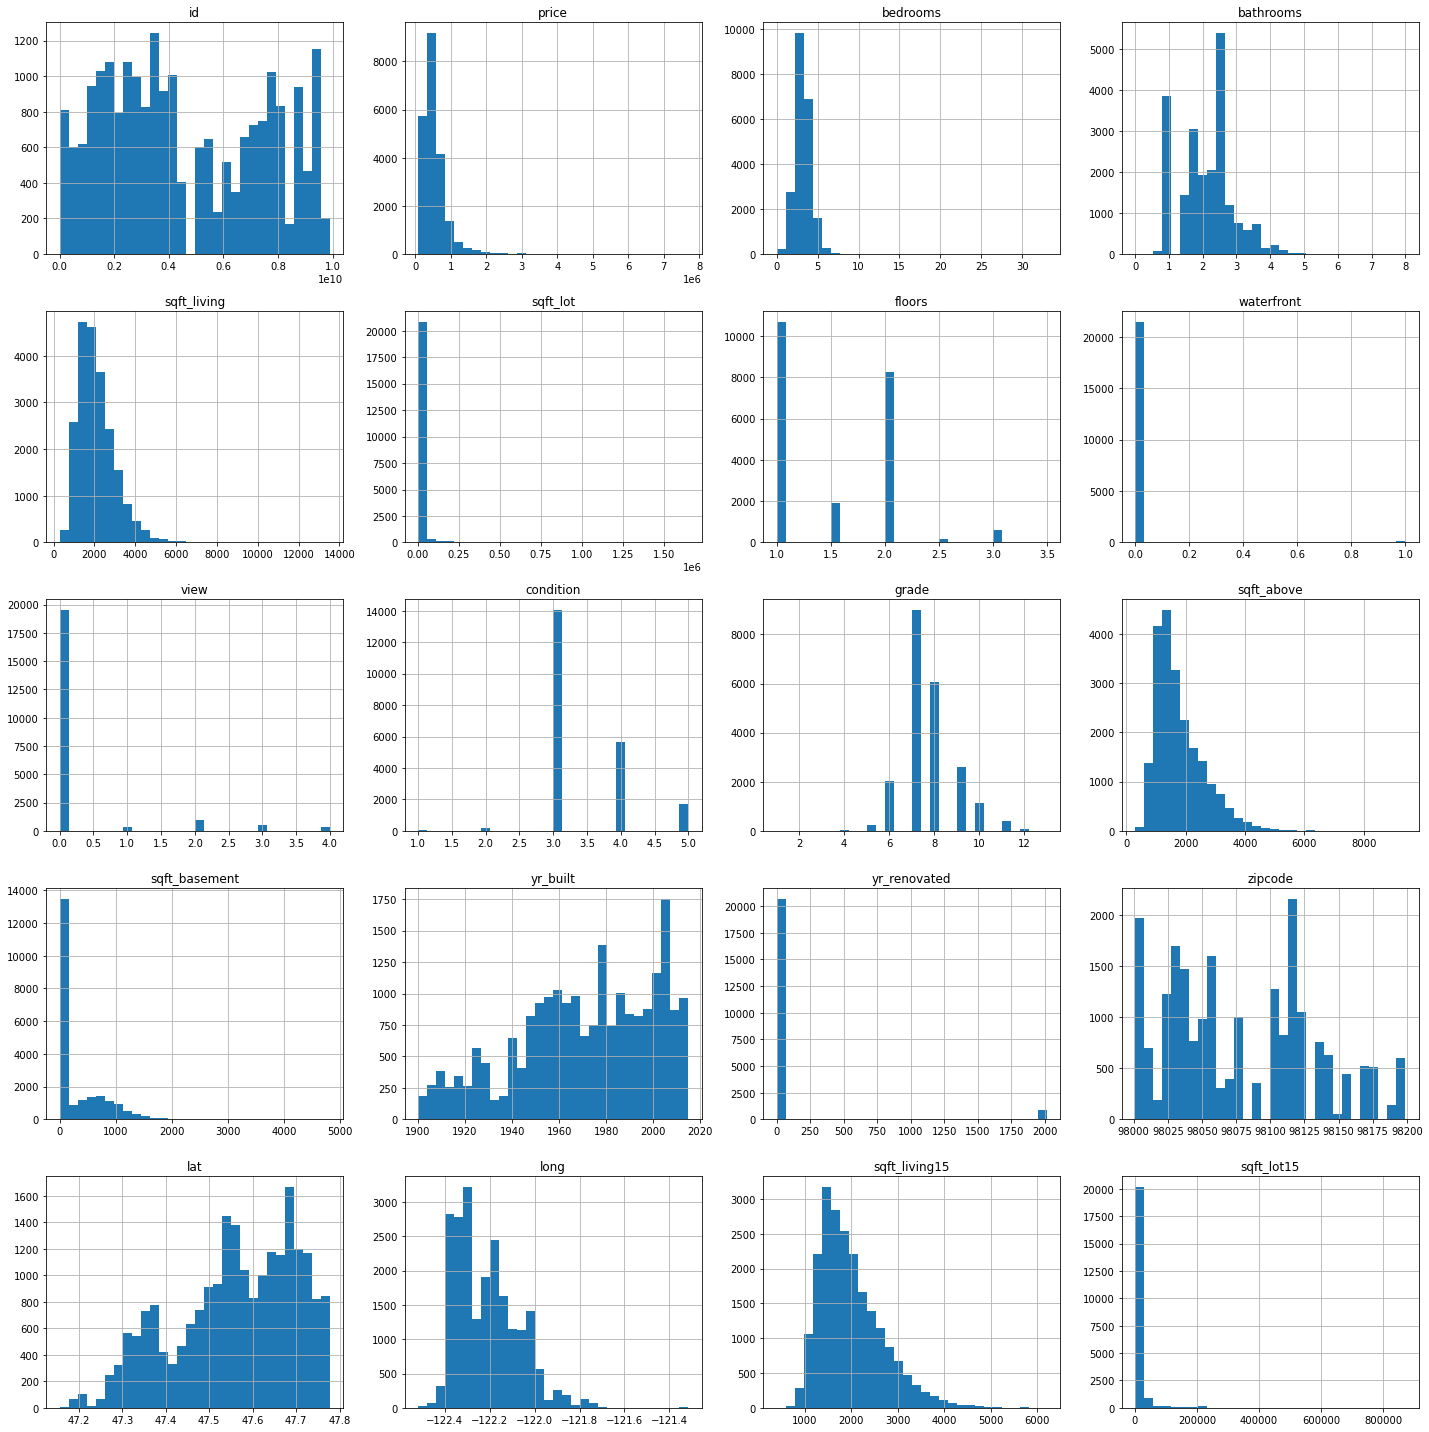

In [64]:
import matplotlib.pyplot as plt

columns_to_inspect = [
    "id", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement",
    "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"
]

columns_numeric = [col for col in columns_to_inspect if df[col].dtype != 'object']

df[columns_numeric].hist(bins=30, figsize=(20, 20), layout=(5, 4))
plt.tight_layout()
plt.show()

**Observations**
1. each house unique id
2. price is the Target feature which found possitively skewed
3. Bathrooms are more tan bedrooms

In [65]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Bivariate Analysis

**Bivariate analysis with price**

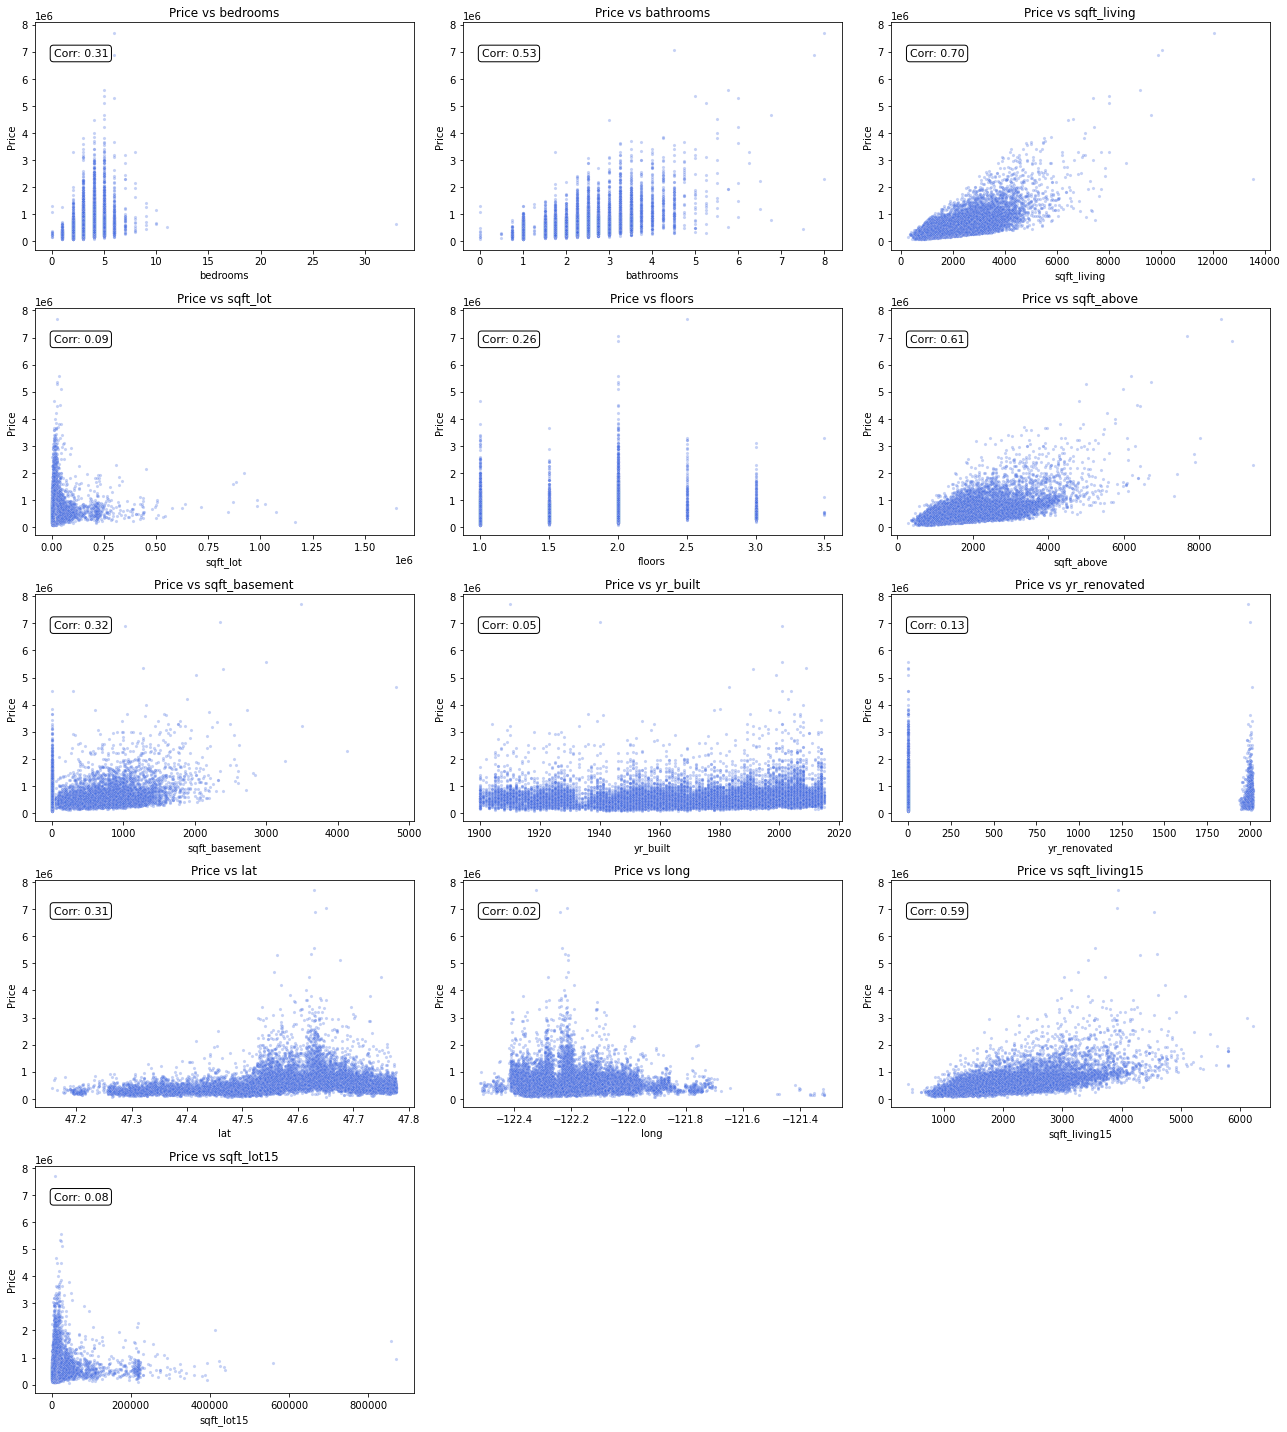

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "sqft_above", "sqft_basement", "yr_built", "yr_renovated",
    "lat", "long", "sqft_living15", "sqft_lot15"
]

n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows))
axes = axes.flatten()  # To index easily

for i, feature in enumerate(features):
    ax = axes[i]
    sns.scatterplot(ax=ax, x=df[feature], y=df["price"], s=10, color='royalblue', alpha=0.3)
    ax.set_title(f"Price vs {feature}")
    corr = df[feature].corr(df["price"])
    ax.annotate(f"Corr: {corr:.2f}", xy=(0.05, 0.85), xycoords='axes fraction', fontsize=11, bbox=dict(boxstyle="round", fc="w"))
    ax.set_xlabel(feature)
    ax.set_ylabel("Price")

# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [67]:
for col in ['waterfront', 'view', 'grade', 'condition',"floors","zipcode"]:
    print(f"--- {col} ---")
    print("Mean prices:")
    print(df.groupby(col)['price'].mean())
    print("Median prices:")
    print(df.groupby(col)['price'].median())
    print

--- waterfront ---
Mean prices:
waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64
Median prices:
waterfront
0     450000.0
1    1400000.0
Name: price, dtype: float64
--- view ---
Mean prices:
view
0    4.965642e+05
1    8.122808e+05
2    7.924009e+05
3    9.719653e+05
4    1.463711e+06
Name: price, dtype: float64
Median prices:
view
0     432500.0
1     690944.0
2     675000.0
3     802500.0
4    1185000.0
Name: price, dtype: float64
--- grade ---
Mean prices:
grade
1     1.420000e+05
3     2.056667e+05
4     2.143810e+05
5     2.485240e+05
6     3.019196e+05
7     4.025903e+05
8     5.428528e+05
9     7.735132e+05
10    1.071771e+06
11    1.496842e+06
12    2.191222e+06
13    3.709615e+06
Name: price, dtype: float64
Median prices:
grade
1      142000.0
3      262000.0
4      205000.0
5      228700.0
6      275276.5
7      375000.0
8      510000.0
9      720000.0
10     914327.0
11    1284000.0
12    1817500.0
13    2983000.0
Name: price, dtype: float64
--- con

**Category Price Summary**

- Waterfront homes are much more expensive on average and median than non-waterfront.
- Higher view and grade numbers strongly correlate with higher prices.
- Condition and more floors also show higher prices with better ratings.
- Zipcodes show large variation in mean/median prices across locations.

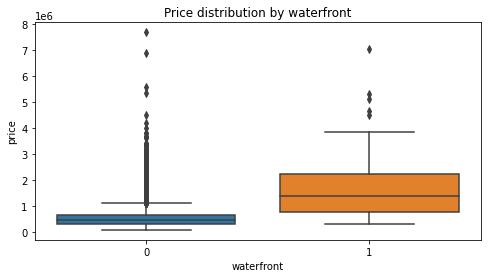

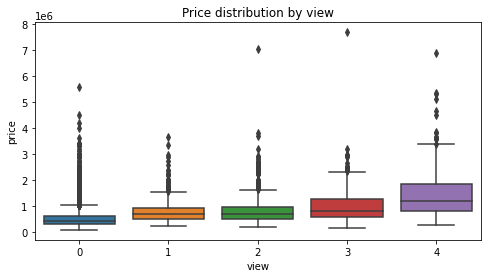

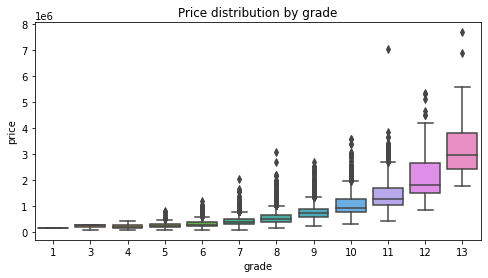

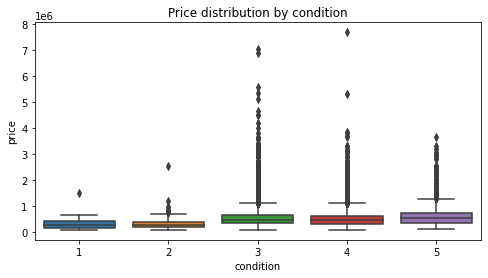

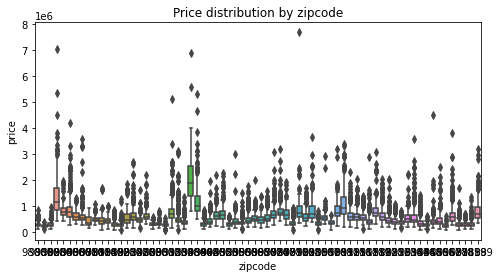

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in ['waterfront', 'view', 'grade', 'condition',"zipcode"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Price distribution by {col}')
    plt.show()

In [69]:
from scipy.stats import f_oneway
for col in ['waterfront', 'view', 'grade', 'condition',"zipcode"]:
    groups = [df[df[col] == cat]['price'] for cat in sorted(df[col].unique())]
    stat, p = f_oneway(*groups)
    print(f"ANOVA {col}: p-value = {p}")

ANOVA waterfront: p-value = 0.0
ANOVA view: p-value = 0.0
ANOVA grade: p-value = 0.0
ANOVA condition: p-value = 3.116011341857883e-31
ANOVA zipcode: p-value = 0.0


Waterfront, view, grade, and condition are the most important factors that increase house prices. Homes with waterfront access or a better view consistently sell for much higher prices than those without. Higher grade and better condition also strongly increase house values. These features have a significant positive impact on price, and should be considered essential in any house price prediction or valuation model

In [70]:
cat= df[['waterfront', 'view', 'grade', 'condition',"zipcode"]]
num = df.drop(columns=['waterfront', 'view', 'grade', 'condition',"zipcode"])

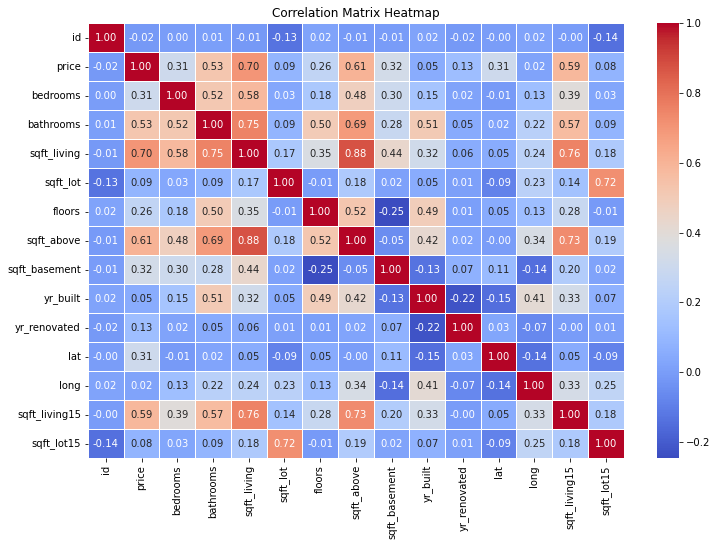

In [71]:
corr_matrix = num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [72]:
corr_matrix = num.corr().abs() 
high_corr = [(col1, col2) for col1 in corr_matrix.columns
                          for col2 in corr_matrix.columns
                          if col1 != col2 and corr_matrix.loc[col1, col2] > 0.9]
print("High collinearity pairs:", high_corr)

High collinearity pairs: []


**observations**

-We found low collinearity price with "id", "zipcode", "lat", "long", "sqft_lot", "condition", "yr_renovated" but that does not mean those are note useful.
-The correlation coeficient more significative was betwee sqft_above and sqft_living, that will suggest that it will make sense to drop one of both features before run the models.

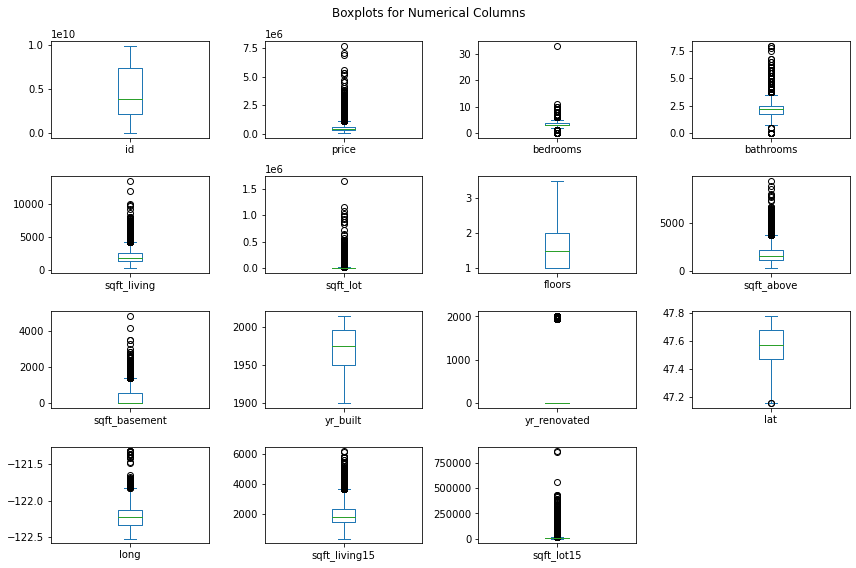

In [73]:
num.plot.box(subplots=True, figsize=(12, 8), layout=(-1, 4), sharey=False)
plt.suptitle('Boxplots for Numerical Columns')
plt.tight_layout()
plt.show()

In [74]:
outliers = {}
for col in num:
    Q1 = num[col].quantile(0.25)
    Q3 = num[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (num[col] < Q1 - 1.5 * IQR) | (num[col] > Q3 + 1.5 * IQR)
    outliers[col] = num[col][outlier_mask]
    num_outliers = len(outliers[col])
    percent_outliers = num_outliers / len(df) * 100
    print(f"{col}: {num_outliers} outliers ({percent_outliers:.1f}%)")

id: 0 outliers (0.0%)
date: 0 outliers (0.0%)
price: 1146 outliers (5.3%)
bedrooms: 546 outliers (2.5%)
bathrooms: 571 outliers (2.6%)
sqft_living: 572 outliers (2.6%)
sqft_lot: 2425 outliers (11.2%)
floors: 0 outliers (0.0%)
sqft_above: 611 outliers (2.8%)
sqft_basement: 496 outliers (2.3%)
yr_built: 0 outliers (0.0%)
yr_renovated: 914 outliers (4.2%)
lat: 2 outliers (0.0%)
long: 256 outliers (1.2%)
sqft_living15: 544 outliers (2.5%)
sqft_lot15: 2194 outliers (10.2%)


-The way to management of all the outliers found will be presented in the coming steps.

In [75]:
skew_values = num.skew()
print(skew_values)

id                0.243329
price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64


C:\Users\lokes\AppData\Local\Temp\ipykernel_54644\1867923042.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_values = num.skew()


Value ≈ 0: Symmetric (normal-like)

Value > 0: Right-skewed (long tail to the right)

Value < 0: Left-skewed (long tail to the left)

Value > 1 or < -1: Highly skewed

observation
we can also apply transfiormation for highly negative or possitivelyv skwed features.


## Feature Creation

In [76]:
df_transform =df.copy()

In [77]:
import numpy as np
# If df['yr_renovated'] is 0, set to 0 (not renovated);
# if it is any year (non-zero), set to 1 (renovated)
df_transform['renovated'] = np.where(df_transform['yr_renovated'] == 0, 0, 1)
print(df_transform['renovated'].value_counts())

0    20699
1      914
Name: renovated, dtype: int64


<AxesSubplot:xlabel='renovated', ylabel='price'>

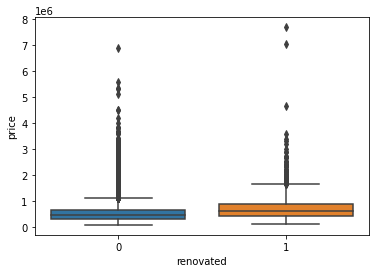

In [78]:
sns.boxplot(x='renovated', y='price', data=df_transform)

In [79]:
from scipy.stats import f_oneway
groups = [df_transform[df_transform['renovated']==r]['price'] for r in df_transform['renovated'].unique()]
stat, p = f_oneway(*groups)
print('ANOVA p-value:', p)

ANOVA p-value: 2.6401485917732445e-77


In [80]:
df_transform["date"] = pd.to_datetime(df["date"], errors="coerce")
df_transform["year_sold"] = df_transform["date"].dt.year
df_transform["age"] = df_transform["year_sold"] - df_transform["yr_built"]
print(df_transform[["yr_built", "year_sold", "age"]].head())

   yr_built  year_sold  age
0      1955       2014   59
1      1951       2014   63
2      1933       2015   82
3      1965       2014   49
4      1987       2015   28


**Crated New features such as age of house and is it renovated or not**

## Data Cleaning

In [81]:
cat= ['waterfront', 'view', 'grade', 'condition',"zipcode", "renovated"]
num = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement",
    "age", "lat", "long", "sqft_living15", "sqft_lot15"]

In [82]:
df_clean = df_transform[[
    "id", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement",
    "age", "lat", "long", "sqft_living15", "sqft_lot15",
    "waterfront", "view", "grade", "condition", "zipcode", "renovated"
]]

In [83]:
df_clean.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,age,lat,long,sqft_living15,sqft_lot15,waterfront,view,grade,condition,zipcode,renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,0,59,47.5112,-122.257,1340,5650,0,0,7,3,98178,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,400,63,47.7210,-122.319,1690,7639,0,0,7,3,98125,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,0,82,47.7379,-122.233,2720,8062,0,0,6,3,98028,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,910,49,47.5208,-122.393,1360,5000,0,0,7,5,98136,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,0,28,47.6168,-122.045,1800,7503,0,0,8,3,98074,0


In [84]:
df_clean = df_clean.copy()
df_clean[cat] = df_clean[cat].astype('category')

In [85]:
df_clean.dtypes

id                  int64
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
sqft_above          int64
sqft_basement       int64
age                 int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
waterfront       category
view             category
grade            category
condition        category
zipcode          category
renovated        category
dtype: object

**converted ['waterfront', 'view', 'grade', 'condition',"zipcode", "renovated"] into categories**

In [86]:
duplicated_ids = df_clean[df_clean.duplicated(subset=['id'], keep=False)]
duplicated_ids

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,age,lat,long,sqft_living15,sqft_lot15,waterfront,view,grade,condition,zipcode,renovated
93,6021501535,430000.0,3,1.50,1580,5000,1.0,1290,290,75,47.6870,-122.386,1570,4500,0,0,8,3,98117,0
94,6021501535,700000.0,3,1.50,1580,5000,1.0,1290,290,75,47.6870,-122.386,1570,4500,0,0,8,3,98117,0
313,4139480200,1384000.0,4,3.25,4290,12103,1.0,2690,1600,17,47.5503,-122.102,3860,11244,0,3,11,3,98006,0
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,2690,1600,17,47.5503,-122.102,3860,11244,0,3,11,3,98006,0
324,7520000520,232000.0,2,1.00,1240,12092,1.0,960,280,92,47.4957,-122.352,1820,7460,0,0,6,3,98146,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,2680,0,2,47.4759,-121.734,2680,5992,0,0,8,3,98045,0
20779,6300000226,240000.0,4,1.00,1200,2171,1.5,1200,0,81,47.7076,-122.342,1130,1598,0,0,7,3,98133,0
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,1200,0,82,47.7076,-122.342,1130,1598,0,0,7,3,98133,0
21580,7853420110,594866.0,3,3.00,2780,6000,2.0,2780,0,1,47.5184,-121.886,2850,6000,0,0,9,3,98065,0


In [87]:
agg_dict = {col: 'first' for col in df_clean.columns if col not in ['id', 'price']}
agg_dict['price'] = 'max'
df_clean = df_clean.groupby('id', as_index=False).agg(agg_dict)

In [88]:
duplicated_ids_1 = df_clean[df_clean.duplicated(subset=['id'], keep=False)]
print(duplicated_ids_1)

Empty DataFrame
Columns: [id, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement, age, lat, long, sqft_living15, sqft_lot15, waterfront, view, grade, condition, zipcode, renovated, price]
Index: []


In [89]:
df_clean = df_clean.drop(columns=['id'])

In [90]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap values outside range
    df_clean[col] = np.where(df_clean[col] < lower, lower,
                             np.where(df_clean[col] > upper, upper, df_clean[col]))

In [91]:
df_clean.shape

(21436, 19)

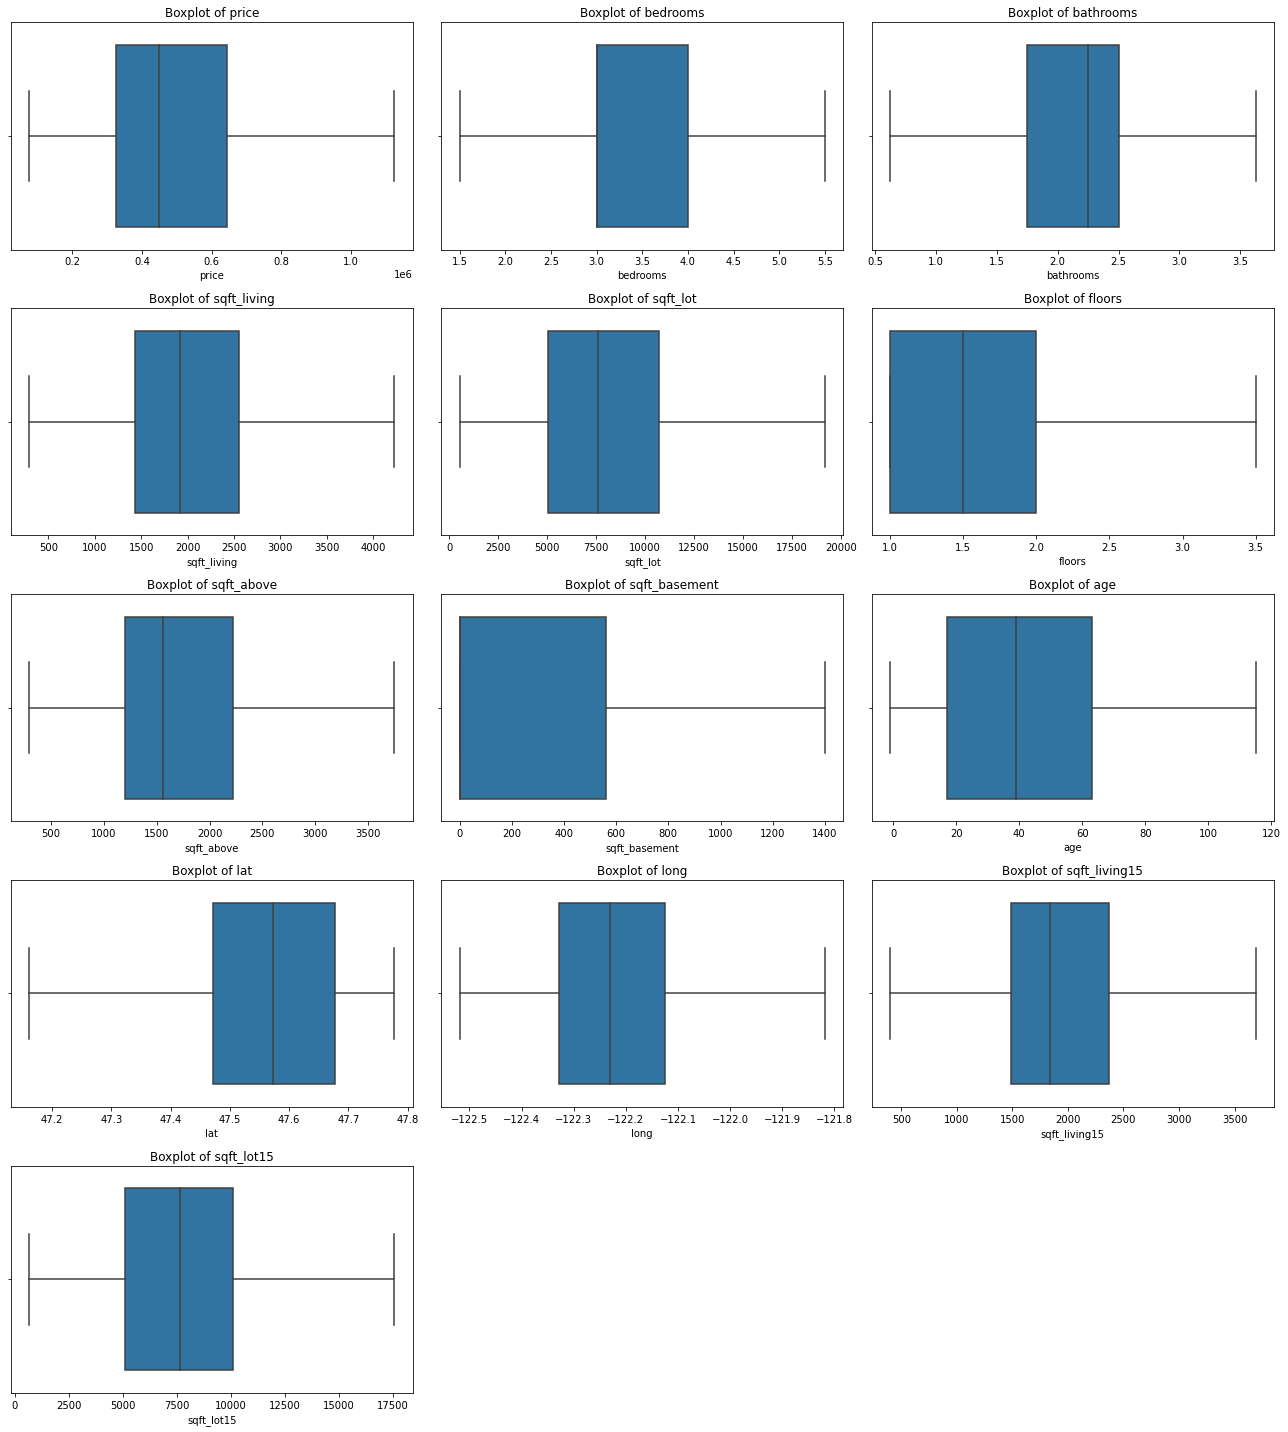

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = num  # list of your numeric column names
n_cols = 3  # number of plots per row
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df_clean[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


**There are no outliers because outliers are Tapped**

## Data Scaling 

In [93]:
df_scale = df_clean.copy()

In [94]:
df_scale.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,age,lat,long,sqft_living15,sqft_lot15,waterfront,view,grade,condition,zipcode,renovated,price
0,5.5,3.00,2400.0,9373.000,2.0,2400.0,0.0,23.0,47.3262,-122.214,2060.0,7316.000,0,0,7,3,98002,0,300000.0
1,4.0,1.75,2060.0,19180.625,1.0,1160.0,900.0,67.0,47.4444,-122.351,2590.0,17568.125,0,0,8,4,98166,0,647500.0
2,3.0,1.00,1460.0,19180.625,1.0,1460.0,0.0,62.0,47.4434,-122.347,2250.0,17568.125,0,0,7,3,98166,0,400000.0
3,3.0,1.00,1430.0,7599.000,1.5,1010.0,420.0,85.0,47.4783,-122.265,1290.0,10320.000,0,0,6,4,98168,0,235000.0
4,4.0,2.00,1650.0,3504.000,1.0,760.0,890.0,64.0,47.5803,-122.294,1480.0,3504.000,0,0,7,3,98144,1,402500.0


In [95]:
num = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "sqft_above", "sqft_basement", "age", "lat", "long",
    "sqft_living15", "sqft_lot15"
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale[num] = scaler.fit_transform(df_scale[num])

In [96]:
df_scale.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,age,lat,long,sqft_living15,sqft_lot15,waterfront,view,grade,condition,zipcode,renovated,price
0,2.503960,1.245857,0.404301,0.131574,0.932318,0.820111,-0.681300,-0.688131,-1.688033,0.004955,0.126880,-0.224728,0,0,7,3,98002,0,300000.0
1,0.745972,-0.486444,-0.000776,2.070858,-0.918246,-0.799988,1.475627,0.809247,-0.835202,-0.992480,0.941331,2.120932,0,0,8,4,98166,0,647500.0
2,-0.426020,-1.525825,-0.715618,2.070858,-0.918246,-0.408028,-0.681300,0.639091,-0.842417,-0.963357,0.418853,2.120932,0,0,7,3,98166,0,400000.0
3,-0.426020,-1.525825,-0.751360,-0.219203,0.007036,-0.995967,0.325266,1.421811,-0.590609,-0.366353,-1.056378,0.462579,0,0,6,4,98168,0,235000.0
4,0.745972,-0.139984,-0.489251,-1.028916,-0.918246,-1.322600,1.451661,0.707153,0.145337,-0.577489,-0.764405,-1.096904,0,0,7,3,98144,1,402500.0


## Data Encoding

In [97]:
df_encode = df_scale.copy()

In [98]:
df_encode.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,age,lat,long,sqft_living15,sqft_lot15,waterfront,view,grade,condition,zipcode,renovated,price
0,2.503960,1.245857,0.404301,0.131574,0.932318,0.820111,-0.681300,-0.688131,-1.688033,0.004955,0.126880,-0.224728,0,0,7,3,98002,0,300000.0
1,0.745972,-0.486444,-0.000776,2.070858,-0.918246,-0.799988,1.475627,0.809247,-0.835202,-0.992480,0.941331,2.120932,0,0,8,4,98166,0,647500.0
2,-0.426020,-1.525825,-0.715618,2.070858,-0.918246,-0.408028,-0.681300,0.639091,-0.842417,-0.963357,0.418853,2.120932,0,0,7,3,98166,0,400000.0
3,-0.426020,-1.525825,-0.751360,-0.219203,0.007036,-0.995967,0.325266,1.421811,-0.590609,-0.366353,-1.056378,0.462579,0,0,6,4,98168,0,235000.0
4,0.745972,-0.139984,-0.489251,-1.028916,-0.918246,-1.322600,1.451661,0.707153,0.145337,-0.577489,-0.764405,-1.096904,0,0,7,3,98144,1,402500.0


| Feature    | Likely Type | Suggested Encoding                                |
| ---------- | ----------- | ------------------------------------------------- |
| waterfront | Nominal     | One-Hot or Label Encoding                         |
| view       | Ordinal     | Ordinal Encoding or Label Encoding                |
| grade      | Ordinal     | Ordinal Encoding                                  |
| condition  | Ordinal     | Ordinal Encoding                                  |
| zipcode    | Nominal     | Target Encoding or One-Hot (consider cardinality) |
| renovated  | Nominal     | One-Hot or Label Encoding                         |

In [99]:
for col in ['view', 'grade', 'condition']:
    df_encode[col] = df_encode[col].cat.codes

In [100]:
nominal = ['waterfront', 'renovated']
df_encode = pd.get_dummies(df_encode, columns=nominal, drop_first=True)

In [101]:
freq = df_encode['zipcode'].value_counts()
df_encode['zipcode_freq'] = df_encode['zipcode'].map(freq)
df_encode = df_encode.drop(columns=['zipcode'])

In [102]:
df_encode.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,age,lat,long,sqft_living15,sqft_lot15,view,grade,condition,price,waterfront_1,renovated_1,zipcode_freq
0,2.503960,1.245857,0.404301,0.131574,0.932318,0.820111,-0.681300,-0.688131,-1.688033,0.004955,0.126880,-0.224728,0,5,2,300000.0,0,0,197
1,0.745972,-0.486444,-0.000776,2.070858,-0.918246,-0.799988,1.475627,0.809247,-0.835202,-0.992480,0.941331,2.120932,0,6,3,647500.0,0,0,250
2,-0.426020,-1.525825,-0.715618,2.070858,-0.918246,-0.408028,-0.681300,0.639091,-0.842417,-0.963357,0.418853,2.120932,0,5,2,400000.0,0,0,250
3,-0.426020,-1.525825,-0.751360,-0.219203,0.007036,-0.995967,0.325266,1.421811,-0.590609,-0.366353,-1.056378,0.462579,0,4,3,235000.0,0,0,264
4,0.745972,-0.139984,-0.489251,-1.028916,-0.918246,-1.322600,1.451661,0.707153,0.145337,-0.577489,-0.764405,-1.096904,0,5,2,402500.0,0,1,340


## Model Training(Filterd Data)

#### Linear Regression

In [103]:
df_model =df_encode.copy()

(17148, 18) (4288, 18) (17148,) (4288,)
| Model Name        |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| Linear Regression |       0.75 |      0.76 | 1.54745e+10 |      124396 |        24.06 |       20.59 |


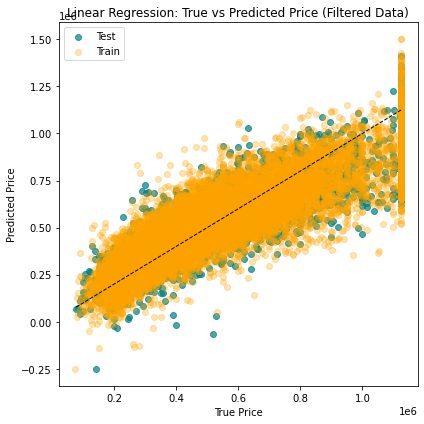

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Data preparation: replace df_model with your filtered DataFrame ===
X = df_model.drop("price", axis=1)
y = df_model["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# === Model Training ===
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# === Metrics Calculation ===
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
percent_rmse_test = rmse_test / np.mean(y_test) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# === Markdown Table Output ===
results = [[
    "Linear Regression",
    round(r2_train, 2),
    round(r2_test, 2),
    round(mse_test, 2),
    round(rmse_test, 2),
    round(percent_rmse_test, 2),
    round(mape_test, 2)
]]
columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

# === Plot: True vs Predicted ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='teal')
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Train', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("Linear Regression: True vs Predicted Price (Filtered Data)")
plt.legend()
plt.tight_layout()
plt.show()


#### Polynomial Regression

| Model Name                    |   R² Train |   R² Test |   MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:------------------------------|-----------:|----------:|-----------:|------------:|-------------:|------------:|
| Polynomial Regression (deg=3) |       0.88 |      0.81 |  1.221e+10 |      110499 |        21.37 |       15.66 |


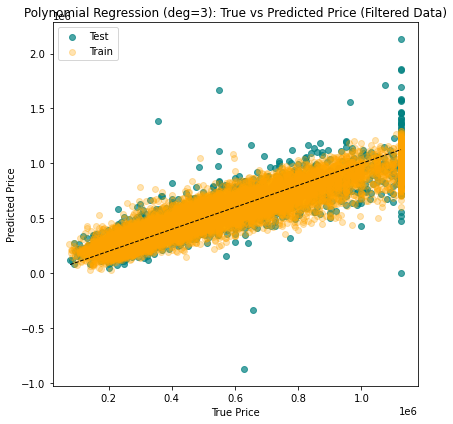

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Data Setup (filtered features) ===
""""X = df_model.drop("price", axis=1)
y = df_model["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"""

# === Polynomial Regression ===
degree = 3  # You can set as needed
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# === Evaluation Metrics ===
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
percent_rmse_test = rmse_test / np.mean(y_test) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

results = [[
    f"Polynomial Regression (deg={degree})",
    round(r2_train, 2),
    round(r2_test, 2),
    round(mse_test, 2),
    round(rmse_test, 2),
    round(percent_rmse_test, 2),
    round(mape_test, 2)
]]
columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

# === Plot: True vs Predicted ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='teal')
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Train', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title(f"Polynomial Regression (deg={degree}): True vs Predicted Price (Filtered Data)")
plt.legend()
plt.tight_layout()
plt.show()


#### Random Forest Regreesor(base model)

| Model Name    |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:--------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| Random Forest |       0.99 |       0.9 | 6.52404e+09 |     80771.6 |        15.62 |       11.96 |


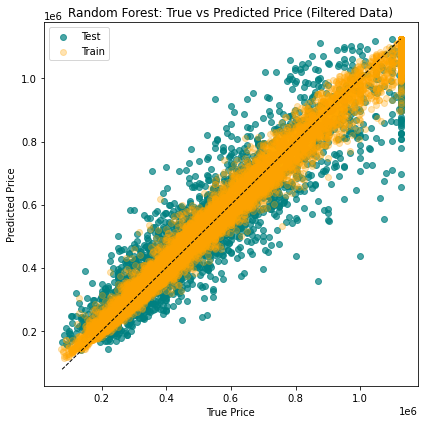

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# == Fit Random Forest ==
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# == Predict ==
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# == Metrics ==
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
percent_rmse_test = rmse_test / np.mean(y_test) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

results = [[
    "Random Forest",
    round(r2_train, 2),
    round(r2_test, 2),
    round(mse_test, 2),
    round(rmse_test, 2),
    round(percent_rmse_test, 2),
    round(mape_test, 2)
]]
columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

# == Plot: True vs Predicted ==
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='teal')
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Train', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("Random Forest: True vs Predicted Price (Filtered Data)")
plt.legend()
plt.tight_layout()
plt.show()


#### Hyper Tuning with Gridserach

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV RMSE score: 81408.2991729768
| Model Name                 |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:---------------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| Random Forest (GridSearch) |       0.99 |       0.9 | 6.53438e+09 |     80835.5 |        15.63 |       11.94 |


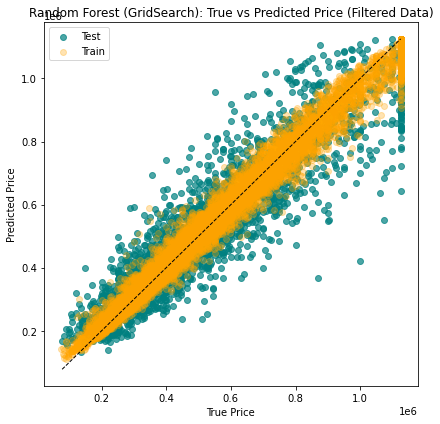

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Grid Search Setup ===
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best CV RMSE score:", -grid_search.best_score_)

# === Best Estimator Evaluation ===
best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
percent_rmse_test = rmse_test / np.mean(y_test) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

results = [[
    "Random Forest (GridSearch)",
    round(r2_train, 2),
    round(r2_test, 2),
    round(mse_test, 2),
    round(rmse_test, 2),
    round(percent_rmse_test, 2),
    round(mape_test, 2)
]]
columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

# === Plot: True vs Predicted ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='teal')
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Train', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("Random Forest (GridSearch): True vs Predicted Price (Filtered Data)")
plt.legend()
plt.tight_layout()
plt.show()

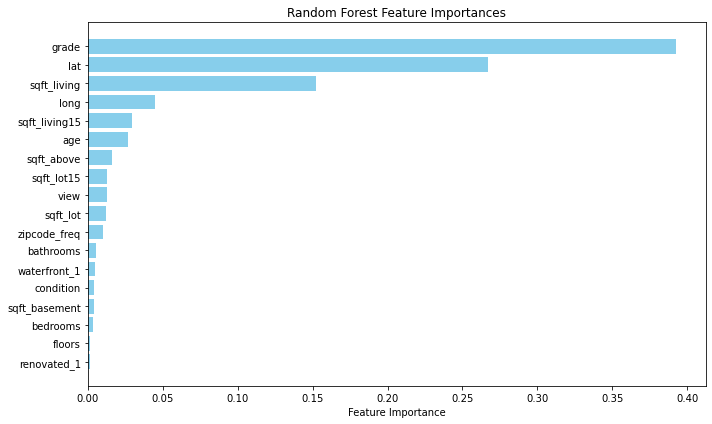

In [109]:
# If using pandas DataFrame for X_train
features = X_train.columns

# Get feature importances from the trained model
importances = best_rf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = features[indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()
plt.show()

#### Xg boost

| Model Name     |   R² Train |   R² Test |   MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:---------------|-----------:|----------:|-----------:|------------:|-------------:|------------:|
| XGBoost (Base) |          1 |       0.9 | 6.6623e+09 |     81622.9 |        15.79 |       12.45 |


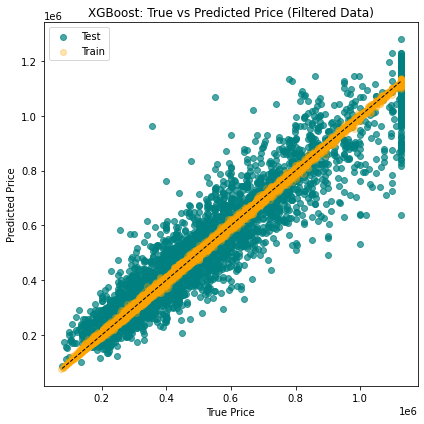

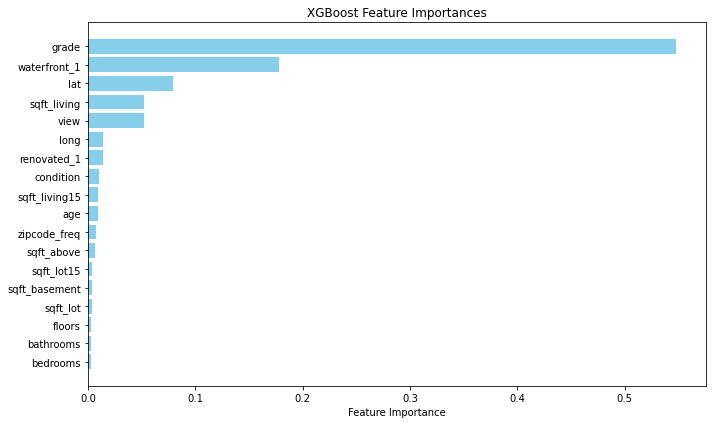

In [110]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Train base XGBoost model
xgb = XGBRegressor(random_state=42, n_estimators=1000, objective='reg:squarederror')
xgb.fit(X_train, y_train)

# 2. Predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# 3. Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
percent_rmse_test = rmse_test / np.mean(y_test) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

results = [[
    "XGBoost (Base)",
    round(r2_train, 2),
    round(r2_test, 2),
    round(mse_test, 2),
    round(rmse_test, 2),
    round(percent_rmse_test, 2),
    round(mape_test, 2)
]]
columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

# 4. Plot: True vs Predicted Values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='teal')
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Train', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("XGBoost: True vs Predicted Price (Filtered Data)")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Feature Importance (bar plot)
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Xgboost Hyper tuning

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.7}
Best CV RMSE: 75058.89100653266
| Model Name           |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:---------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| XGBoost (GridSearch) |       0.96 |      0.91 | 5.49927e+09 |     74157.1 |        14.34 |       11.25 |


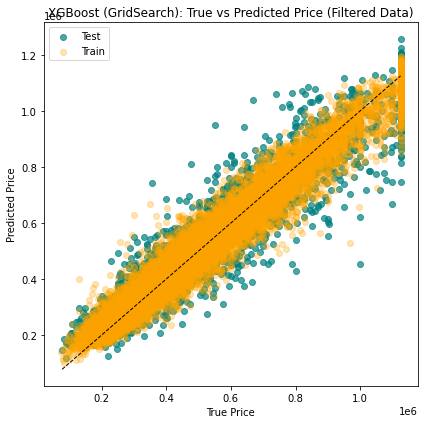

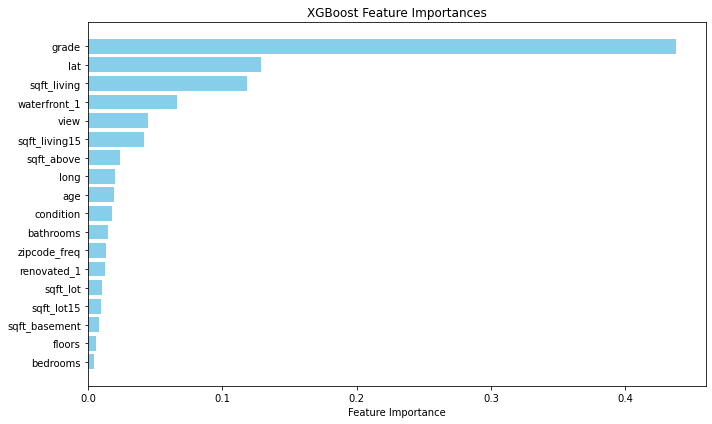

In [112]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Set up GridSearchCV ===
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

best_xgb = grid_search.best_estimator_

# === Metrics on train and test ===
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
percent_rmse_test = rmse_test / np.mean(y_test) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

results = [[
    "XGBoost (GridSearch)",
    round(r2_train, 2),
    round(r2_test, 2),
    round(mse_test, 2),
    round(rmse_test, 2),
    round(percent_rmse_test, 2),
    round(mape_test, 2)
]]
columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

# === Plot: True vs Predicted Values ===
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='teal')
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Train', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("XGBoost (GridSearch): True vs Predicted Price (Filtered Data)")
plt.legend()
plt.tight_layout()
plt.show()

# === (Optional) Feature Importance Plot ===
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### Knn regrssor

| Model Name                |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:--------------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| KNeighborsRegressor (n=5) |       0.91 |      0.87 | 8.41042e+09 |     91708.4 |        17.74 |       13.42 |


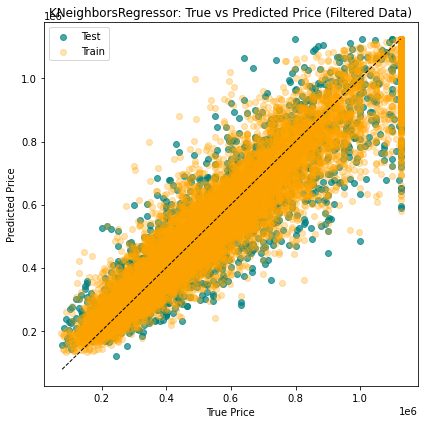

In [113]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Train KNN Regressor (default n_neighbors=5)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# 2. Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# 3. Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
percent_rmse_test = rmse_test / np.mean(y_test) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

results = [[
    "KNeighborsRegressor (n=5)",
    round(r2_train, 2),
    round(r2_test, 2),
    round(mse_test, 2),
    round(rmse_test, 2),
    round(percent_rmse_test, 2),
    round(mape_test, 2)
]]
columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

# 4. True vs. Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test', color='teal')
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Train', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title("KNeighborsRegressor: True vs Predicted Price (Filtered Data)")
plt.legend()
plt.tight_layout()
plt.show()


| Model Name   |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:-------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| KNN (k=1)    |       1    |      0.8  | 1.29411e+10 |    113759   |        22    |       16.13 |
| KNN (k=3)    |       0.93 |      0.86 | 8.90094e+09 |     94344.8 |        18.25 |       13.75 |
| KNN (k=5)    |       0.91 |      0.87 | 8.41042e+09 |     91708.4 |        17.74 |       13.42 |
| KNN (k=7)    |       0.9  |      0.87 | 8.40041e+09 |     91653.7 |        17.73 |       13.37 |
| KNN (k=9)    |       0.89 |      0.87 | 8.53837e+09 |     92403.3 |        17.87 |       13.38 |
| KNN (k=11)   |       0.88 |      0.86 | 8.65357e+09 |     93024.6 |        17.99 |       13.39 |


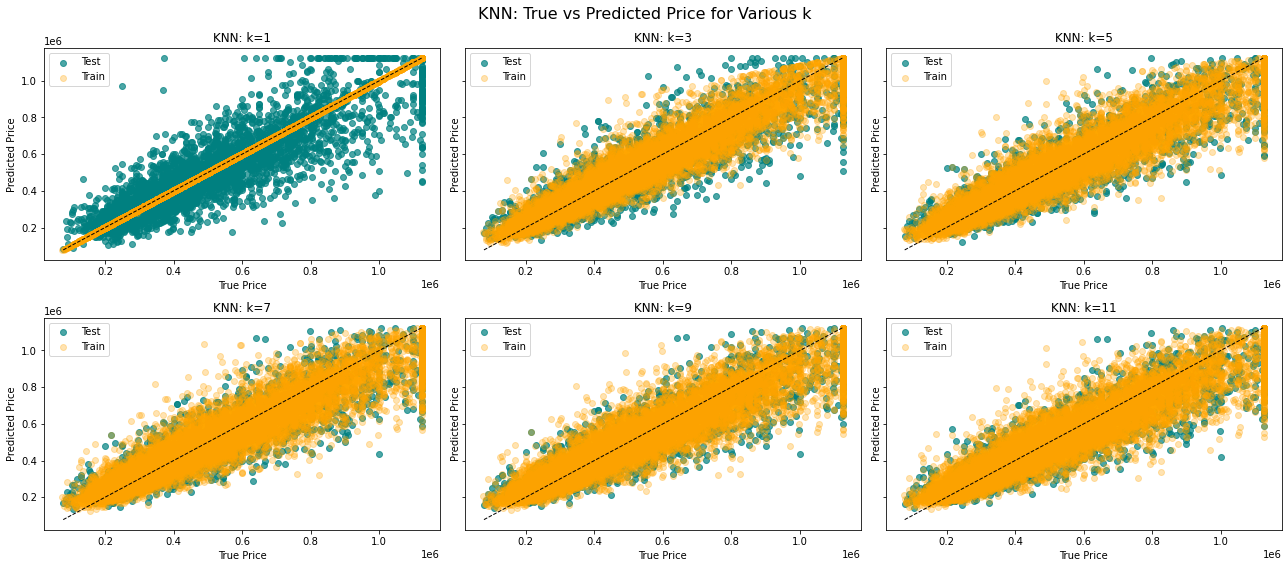

In [116]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7, 9,11]  # Try as many as you like

results = []
preds_test_all = {}
preds_train_all = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Store for plotting later
    preds_train_all[k] = y_train_pred
    preds_test_all[k] = y_test_pred

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    percent_rmse_test = rmse_test / np.mean(y_test) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    results.append([
        f"KNN (k={k})",
        round(r2_train, 2),
        round(r2_test, 2),
        round(mse_test, 2),
        round(rmse_test, 2),
        round(percent_rmse_test, 2),
        round(mape_test, 2)
    ])

columns = ["Model Name", "R² Train", "R² Test", "MSE Test", "RMSE Test", "%RMSE Test", "MAPE Test"]
df_results = pd.DataFrame(results, columns=columns)
print(df_results.to_markdown(index=False))

# === Plot: scatter plots for all ks ===
n_plots = len(k_values)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 4*n_rows), sharey=True)
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    ax.scatter(y_test, preds_test_all[k], alpha=0.7, label='Test', color='teal')
    ax.scatter(y_train, preds_train_all[k], alpha=0.3, label='Train', color='orange')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=1)
    ax.set_xlabel('True Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f"KNN: k={k}")
    ax.legend()

# Remove unused axes
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("KNN: True vs Predicted Price for Various k", fontsize=16)
plt.tight_layout()
plt.show()


Models Comparison:
| Model Name           |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:---------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| XGBoost (GridSearch) |       0.96 |      0.91 | 5.49927e+09 |     74157.1 |        14.34 |       11.25 |

| Model Name   |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:-------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| KNN (k=1)    |       1    |      0.8  | 1.29411e+10 |    113759   |        22    |       16.13 |
| KNN (k=3)    |       0.93 |      0.86 | 8.90094e+09 |     94344.8 |        18.25 |       13.75 |
| KNN (k=5)    |       0.91 |      0.87 | 8.41042e+09 |     91708.4 |        17.74 |       13.42 |
| KNN (k=7)    |       0.9  |      0.87 | 8.40041e+09 |     91653.7 |        17.73 |       13.37 |
| KNN (k=9)    |       0.89 |      0.87 | 8.53837e+09 |     92403.3 |        17.87 |       13.38 |
| KNN (k=11)   |       0.88 |      0.86 | 8.65357e+09 |     93024.6 |        17.99 |       13.39 |

| Model Name                |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:--------------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| KNeighborsRegressor (n=5) |       0.91 |      0.87 | 8.41042e+09 |     91708.4 |        17.74 |       13.42 |

| Model Name     |   R² Train |   R² Test |   MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:---------------|-----------:|----------:|-----------:|------------:|-------------:|------------:|
| XGBoost (Base) |          1 |       0.9 | 6.6623e+09 |     81622.9 |        15.79 |       12.45 |


| Model Name                 |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:---------------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| Random Forest (GridSearch) |       0.99 |       0.9 | 6.53438e+09 |     80835.5 |        15.63 |       11.94 |

| Model Name                    |   R² Train |   R² Test |   MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:------------------------------|-----------:|----------:|-----------:|------------:|-------------:|------------:|
| Polynomial Regression (deg=3) |       0.88 |      0.81 |  1.221e+10 |      110499 |        21.37 |       15.66 |

| Model Name        |   R² Train |   R² Test |    MSE Test |   RMSE Test |   %RMSE Test |   MAPE Test |
|:------------------|-----------:|----------:|------------:|------------:|-------------:|------------:|
| Linear Regression |       0.75 |      0.76 | 1.54745e+10 |      124396 |        24.06 |       20.59 |

Conclusion:                                                                                
We compared multiple models - from simple Linear Regression to advanced ensemble methods like Random Forest, AdaBoost, and XGBoost - both before and after data cleaning and feature processing.
The main goal was to evaluate how data quality and modeling techniques influence predictive performance.
After thorough experimentation and refinement:
XGBoost emerged as the most reliable and accurate model, achieving strong generalization (R² ≈ 0.96) and robust performance across all validation metrics.